<a href="https://colab.research.google.com/github/HambaliMarcel/domainscan-surrounding-poc/blob/main/domainscan-surrounding-script-main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python script to use multiple tools for subdomain enumeration.
# Using Sublist3r, Amass, requests & dns pythn
# To Search Pelind* Surrounding System

In [ ]:
!pip install sublist3r
!pip install amass
!pip install requests
!pip install dnspython


In [2]:
import subprocess
import requests
import dns.resolver
from IPython.display import display, HTML

def run_sublist3r(domain):
    command = f"sublist3r -d {domain} -o sublist3r_output.txt"
    subprocess.run(command, shell=True, check=True)
    with open("sublist3r_output.txt", "r") as file:
        subdomains = file.read().splitlines()
    return subdomains

def dnsdumpster_search(domain):
    response = requests.get(f"https://api.hackertarget.com/hostsearch/?q={domain}")
    subdomains = [line.split(",")[0] for line in response.text.splitlines()]
    return subdomains

def aggregate_subdomains(*args):
    all_subdomains = set()
    for sublist in args:
        all_subdomains.update(sublist)
    return sorted(all_subdomains)

def check_dns_resolution(subdomains):
    resolved_subdomains = []
    for subdomain in subdomains:
        try:
            dns.resolver.resolve(subdomain, 'A')
            resolved_subdomains.append(subdomain)
        except (dns.resolver.NXDOMAIN, dns.resolver.NoAnswer, dns.resolver.Timeout):
            continue
        except Exception as e:
            continue
    return resolved_subdomains

def check_subdomain_availability(subdomains, domain):
    results = []
    for subdomain in subdomains:
        url = f"http://{subdomain}"
        try:
            response = requests.get(url, timeout=5)
            if response.status_code == 200:
                status = "Active"
            else:
                status = f"Inactive (HTTP {response.status_code})"
        except requests.exceptions.RequestException:
            status = "Inactive (No Response)"
        results.append(f"{subdomain} - {url} - {status}")
    return results

def main(domain):
    sublist3r_results = run_sublist3r(domain)
    dnsdumpster_results = dnsdumpster_search(domain)
    all_subdomains = aggregate_subdomains(sublist3r_results, dnsdumpster_results)
    resolved_subdomains = check_dns_resolution(all_subdomains)
    availability_results = check_subdomain_availability(resolved_subdomains, domain)
    display(HTML("<br>".join(availability_results)))

domain = "pelindo.co.id"
main(domain)

In [4]:
# Advance Check using Anayticss

import subprocess
import requests
import dns.resolver
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [6]:
def run_sublist3r(domain):
    command = f"sublist3r -d {domain} -o sublist3r_output.txt"
    subprocess.run(command, shell=True, check=True)
    with open("sublist3r_output.txt", "r") as file:
        subdomains = file.read().splitlines()
    return subdomains

def dnsdumpster_search(domain):
    response = requests.get(f"https://api.hackertarget.com/hostsearch/?q={domain}")
    subdomains = [line.split(",")[0] for line in response.text.splitlines()]
    return subdomains

def aggregate_subdomains(*args):
    all_subdomains = set()
    for sublist in args:
        all_subdomains.update(sublist)
    return sorted(all_subdomains)

def check_dns_resolution(subdomains):
    resolved_subdomains = []
    for subdomain in subdomains:
        try:
            dns.resolver.resolve(subdomain, 'A')
            resolved_subdomains.append(subdomain)
        except (dns.resolver.NXDOMAIN, dns.resolver.NoAnswer, dns.resolver.Timeout):
            continue
        except Exception as e:
            continue
    return resolved_subdomains

def check_subdomain_availability(subdomains, domain):
    results = []
    statuses = []
    for subdomain in subdomains:
        url = f"http://{subdomain}"
        try:
            response = requests.get(url, timeout=5)
            if response.status_code == 200:
                status = "Active"
            else:
                status = f"Inactive (HTTP {response.status_code})"
        except requests.exceptions.RequestException:
            status = "Inactive (No Response)"
        results.append({"Subdomain": subdomain, "URL": url, "Status": status})
        statuses.append(status)
    return pd.DataFrame(results), statuses

def visualize_results(df, statuses):
    df['Status'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
    plt.title('Subdomain Availability Status')
    plt.xlabel('Status')
    plt.ylabel('Number of Subdomains')
    plt.show()

    df_active = df[df['Status'] == 'Active']
    display(df_active)

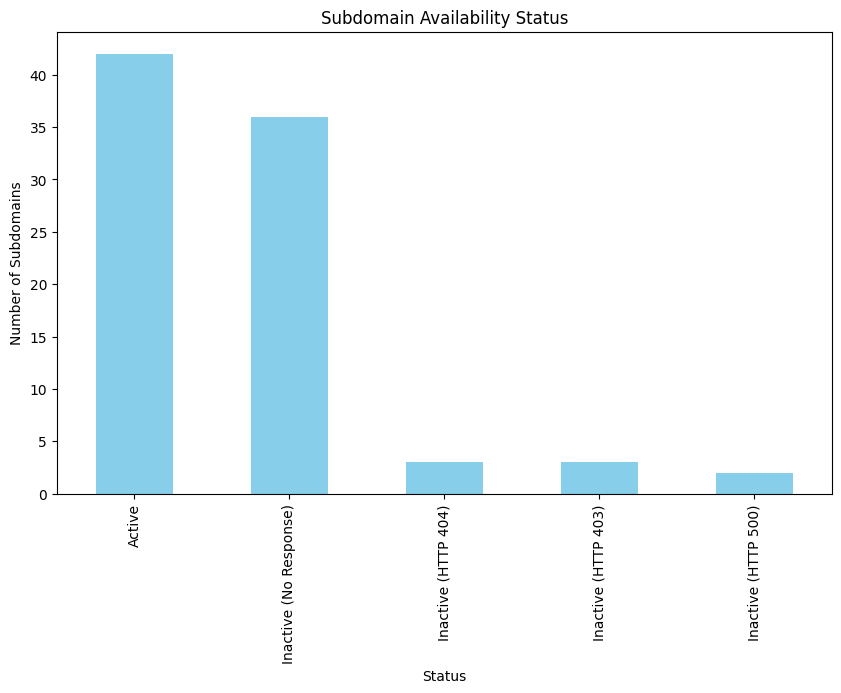

,Subdomain,URL,Status
0,airwatch.pelindo.co.id,http://airwatch.pelindo.co.id,Active
2,api.pelindo.co.id,http://api.pelindo.co.id,Active
3,badge-service-portaverse.pelindo.co.id,http://badge-service-portaverse.pelindo.co.id,Active
5,cctvonline.pelindo.co.id,http://cctvonline.pelindo.co.id,Active
6,centra-dev.pelindo.co.id,http://centra-dev.pelindo.co.id,Active
7,centra-fi.pelindo.co.id,http://centra-fi.pelindo.co.id,Active
8,centra-qa.pelindo.co.id,http://centra-qa.pelindo.co.id,Active
9,centra.pelindo.co.id,http://centra.pelindo.co.id,Active
10,cms-service-portaverse.pelindo.co.id,http://cms-service-portaverse.pelindo.co.id,Active
12,course-service-portaverse.pelindo.co.id,http://course-service-portaverse.pelindo.co.id,Active


No charts were generated by quickchart


In [7]:
def main(domain):
    sublist3r_results = run_sublist3r(domain)
    dnsdumpster_results = dnsdumpster_search(domain)
    all_subdomains = aggregate_subdomains(sublist3r_results, dnsdumpster_results)
    resolved_subdomains = check_dns_resolution(all_subdomains)
    df_results, statuses = check_subdomain_availability(resolved_subdomains, domain)
    visualize_results(df_results, statuses)

domain = "pelindo.co.id"
main(domain)